<a href="https://colab.research.google.com/github/yumoylmz/House-Rent-Prediction/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
train_df=pd.read_csv('train.csv')

In [154]:
train_df

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,6161,İzmir,Çeşme,Boyalık,Villa,Villa,11,250 m2,3 + 1,NaN,True,2.0,İkinci El,Klima,Elektrik,650000
6162,6162,İstanbul,Kadıköy,Feneryolu,Daire,Daire,30,126 m2,3 + 1,8. Kat,False,1.0,NaN,Merkezi,Doğalgaz,30000
6163,6163,İstanbul,Bahçelievler,Siyavuşpaşa,Daire,Daire,30,125 m2,3 + 1,4. Kat,False,1.0,İkinci El,Kombi,Doğalgaz,18000
6164,6164,İstanbul,Şişli,Esentepe,Daire,Daire,13,120 m2,3 + 1,2. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,40000


In [155]:
train_df['LogPrice'] = np.log(train_df['Price'])

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6166 non-null   int64  
 1   City            6166 non-null   object 
 2   Town            6166 non-null   object 
 3   Neighborhood    6166 non-null   object 
 4   Apartment Type  6166 non-null   object 
 5   House Type      6166 non-null   object 
 6   House Age       6166 non-null   object 
 7   House Size      6166 non-null   object 
 8   Room Count      6166 non-null   object 
 9   Floor           5760 non-null   object 
 10  Furniture       5934 non-null   object 
 11  Bathroom Count  6164 non-null   float64
 12  Hand            5043 non-null   object 
 13  Heater Type     6166 non-null   object 
 14  Heater Fuel     5147 non-null   object 
 15  Price           6166 non-null   int64  
 16  LogPrice        6166 non-null   float64
dtypes: float64(2), int64(2), object(1

In [157]:
train_df.isnull().sum()

,0
Unnamed: 0,0
City,0
Town,0
Neighborhood,0
Apartment Type,0
House Type,0
House Age,0
House Size,0
Room Count,0
Floor,406


In [158]:
train_df.dropna(inplace=True)

In [159]:
train_df.drop(columns=["Unnamed: 0"], inplace=True)

In [160]:
train_df.describe()

,Bathroom Count,Price,LogPrice
count,4433.000000,4.433000e+03,4433.000000
mean,1.280848,5.834609e+04,9.939676
std,0.580470,6.584672e+05,0.849186
min,1.000000,9.900000e+01,4.595120
25%,1.000000,1.350000e+04,9.510445
50%,1.000000,1.800000e+04,9.798127
75%,1.000000,2.600000e+04,10.165852
max,11.000000,3.250000e+07,17.296751


In [161]:
fig = px.histogram(train_df, x='LogPrice',color_discrete_sequence=px.colors.qualitative.Set3,title='Log Transformed House Price Distribution')
fig.show()

In [162]:
train_df['Price'].value_counts()

,count
Price,
15000,321
20000,307
25000,241
10000,186
18000,169
...,...
72500,1
16100,1
139500,1


In [163]:
fig = px.box(train_df, y='Price', title="House Price Distribution")
fig.show()

In [164]:
top_categories = train_df['House Age'].value_counts().nlargest(6)

fig = px.pie(names=top_categories.index, values=top_categories.values,
             height=700, width=700,
             color_discrete_sequence=px.colors.sequential.deep,
             title='Top 6 House Age Categories')

fig.update_traces(textfont_size=15)
fig.show()


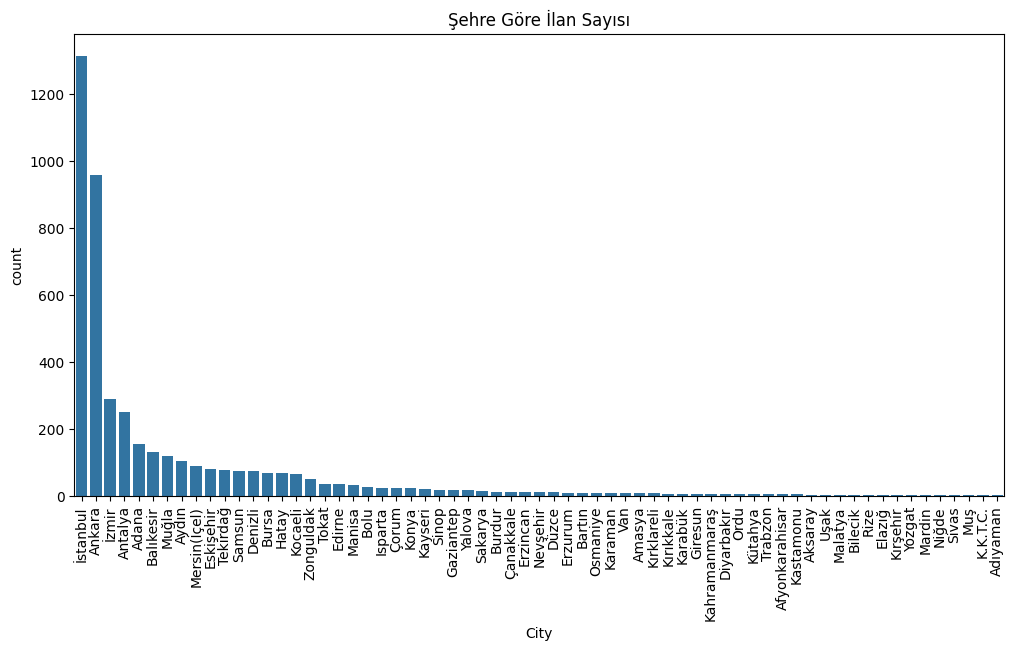

In [165]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='City', order=train_df['City'].value_counts().index)
plt.title('Şehre Göre İlan Sayısı')
plt.xticks(rotation=90)
plt.show()

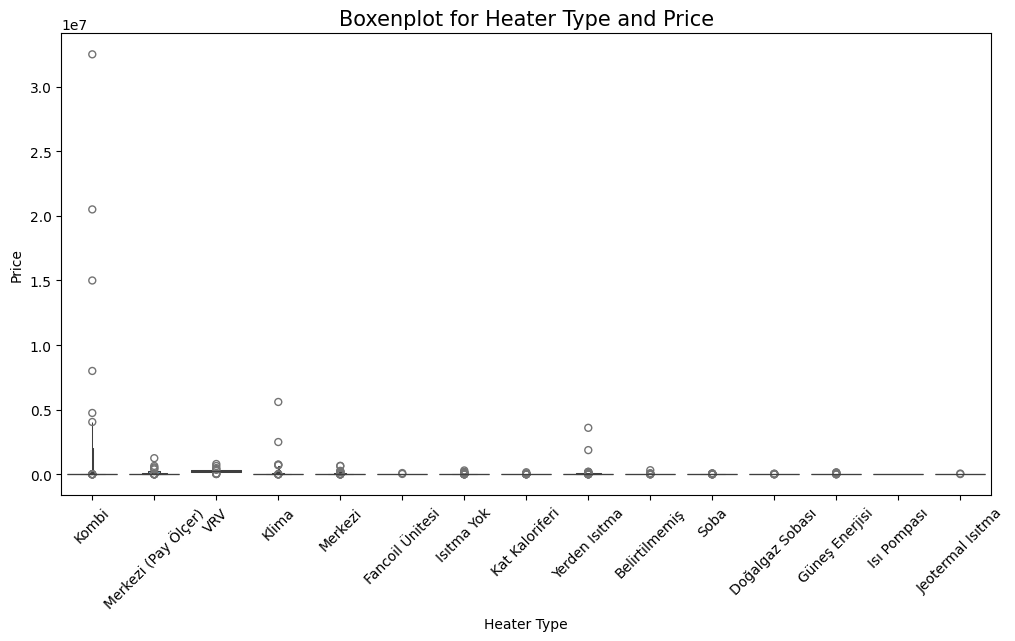

In [166]:
fig,axes = plt.subplots(figsize=(12,6))
sns.boxenplot(x="Heater Type", y='Price',data=train_df)
plt.title('Boxenplot for Heater Type and Price',fontsize=15)
plt.xticks(rotation=45)
plt.show()

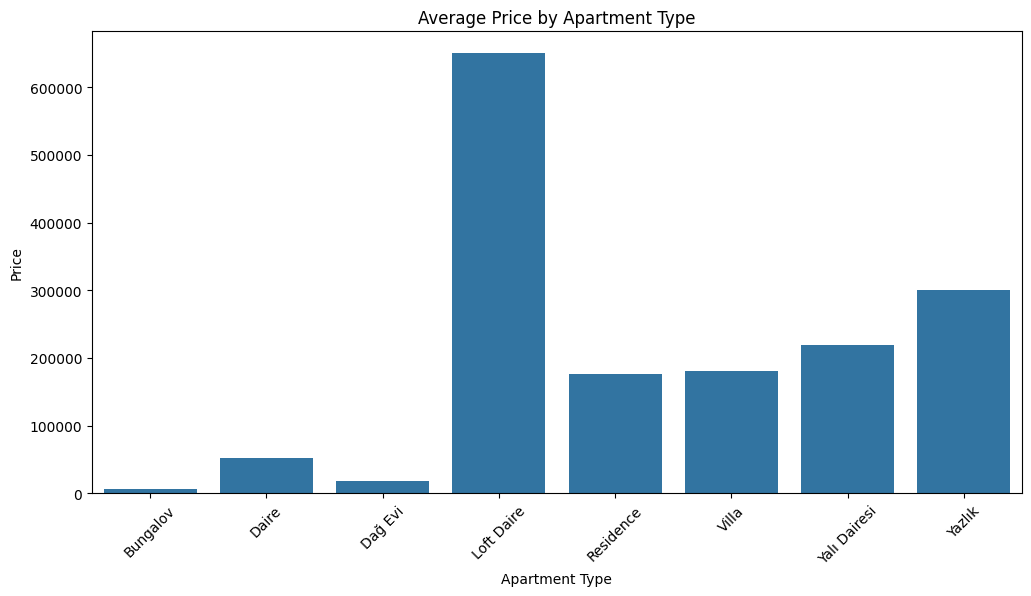

In [167]:
avg_rent = train_df.groupby("Apartment Type")["Price"].mean().reset_index()

fig, axes = plt.subplots(figsize=(12,6))
sns.barplot(x="Apartment Type", y="Price", data=avg_rent)
plt.title("Average Price by Apartment Type", fontsize=12)
plt.xticks(rotation=45)
plt.show()

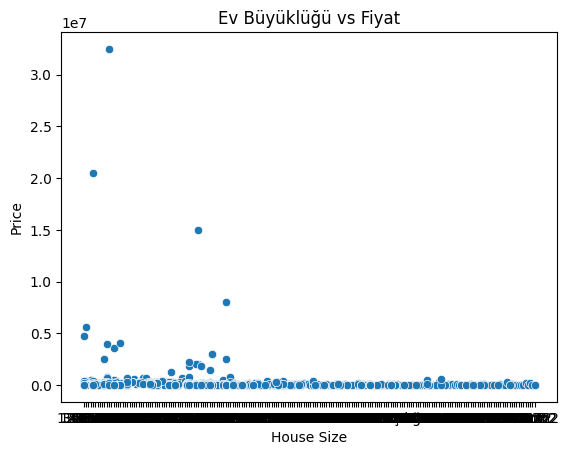

In [168]:
sns.scatterplot(x='House Size', y='Price', data=train_df)
plt.title("Ev Büyüklüğü vs Fiyat")
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

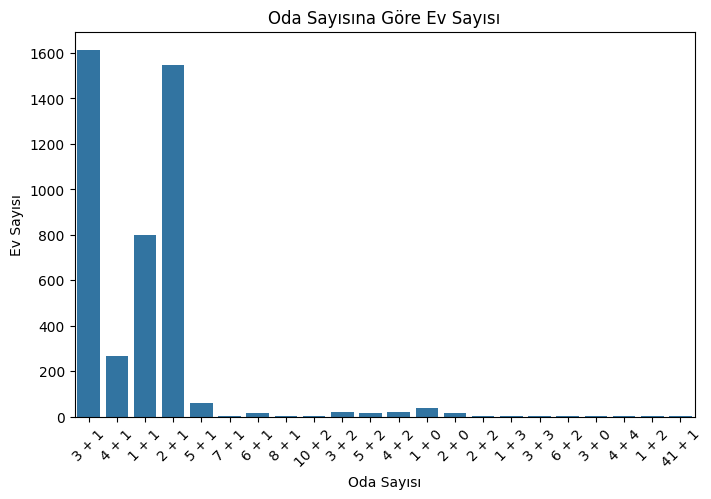

In [169]:
plt.figure(figsize=(8,5))
sns.countplot(x='Room Count', data=train_df)
plt.title('Oda Sayısına Göre Ev Sayısı')
plt.xlabel('Oda Sayısı')
plt.xticks(rotation=45)
plt.ylabel('Ev Sayısı')
plt.show()

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
le = LabelEncoder()

categorical_cols = ['City', 'Town', 'Neighborhood', 'Apartment Type', 'House Type', 'Room Count', 'House Age', 'House Size','Floor', 'Furniture', 'Hand', 'Heater Type', 'Heater Fuel']

for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])

In [172]:
train_df

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,LogPrice
0,5,130,57,1,1,25,26,9,21,1,2.0,2,9,1,16000,9.680344
1,0,175,1034,1,1,43,38,9,4,0,2.0,2,9,1,15500,9.648595
2,63,41,744,4,4,57,129,12,13,0,3.0,1,11,1,350000,12.765688
3,63,41,744,4,4,57,127,12,21,0,4.0,1,11,1,350000,12.765688
4,63,232,365,1,1,7,189,1,16,1,1.0,2,11,1,60000,11.002100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,28,139,106,1,1,28,11,6,14,0,1.0,2,12,3,2000,7.600902
6159,5,198,167,1,1,57,162,1,2,1,1.0,1,11,1,23250,10.054060
6160,63,75,857,1,1,34,69,9,14,0,2.0,2,9,1,21000,9.952278
6163,63,25,864,1,1,26,26,9,15,0,1.0,2,9,1,18000,9.798127


In [173]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4433 entries, 0 to 6164
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            4433 non-null   int64  
 1   Town            4433 non-null   int64  
 2   Neighborhood    4433 non-null   int64  
 3   Apartment Type  4433 non-null   int64  
 4   House Type      4433 non-null   int64  
 5   House Age       4433 non-null   int64  
 6   House Size      4433 non-null   int64  
 7   Room Count      4433 non-null   int64  
 8   Floor           4433 non-null   int64  
 9   Furniture       4433 non-null   int64  
 10  Bathroom Count  4433 non-null   float64
 11  Hand            4433 non-null   int64  
 12  Heater Type     4433 non-null   int64  
 13  Heater Fuel     4433 non-null   int64  
 14  Price           4433 non-null   int64  
 15  LogPrice        4433 non-null   float64
dtypes: float64(2), int64(14)
memory usage: 588.8 KB


In [174]:
train_df.head()

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,LogPrice
0,5,130,57,1,1,25,26,9,21,1,2.0,2,9,1,16000,9.680344
1,0,175,1034,1,1,43,38,9,4,0,2.0,2,9,1,15500,9.648595
2,63,41,744,4,4,57,129,12,13,0,3.0,1,11,1,350000,12.765688
3,63,41,744,4,4,57,127,12,21,0,4.0,1,11,1,350000,12.765688
4,63,232,365,1,1,7,189,1,16,1,1.0,2,11,1,60000,11.002100


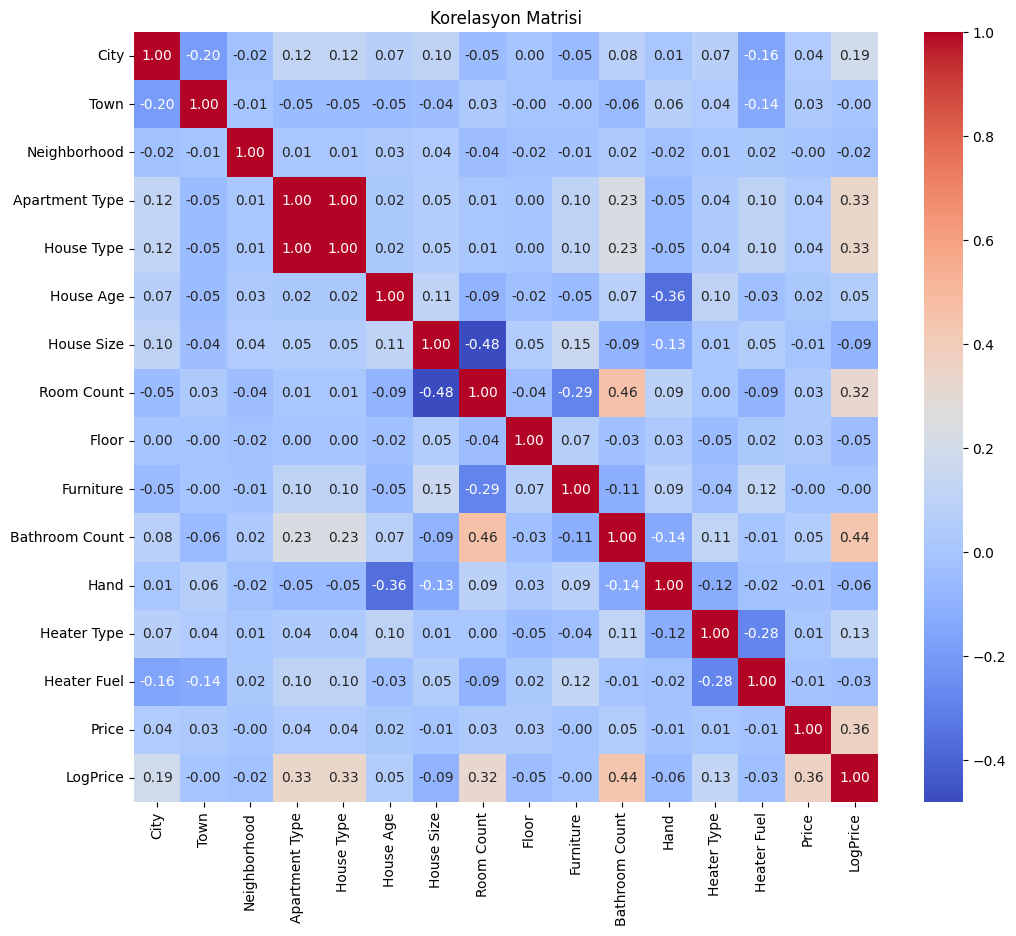

In [175]:
plt.figure(figsize=(12, 10))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [176]:
X = train_df.drop(columns=['Price', 'LogPrice'])
y = train_df['LogPrice']

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("rmse Skoru:", round(rmse, 2))
print("mape Skoru:", round(mape, 2))



rmse Skoru: 0.55
mape Skoru: 0.04


In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [181]:
model = RandomForestRegressor(n_estimators=50, max_depth = 10, min_samples_split=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mae Skoru:",round(mae, 2))
print("mse Skoru:",round(mse, 2))
print("rmse Skoru:",round(rmse, 2))
print("r2 Skoru:",round(r2, 2))



mae Skoru: 0.38
mse Skoru: 0.45
rmse Skoru: 0.45
r2 Skoru: 0.39


In [182]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [184]:
model = XGBRegressor(n_estimators=100, LearningRate = 0.1, max_depth = 3 )
model.fit(X_train,y_train)

XGBRegressor(LearningRate=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [185]:
score = model.score(X_test, y_test)
print(f"R2 Skoru: {r2:.2f}")

R2 Skoru: 0.39
